# Ejercicio 2: Clasificación de frases según emojis. | k-Nearest Neighboes

### Descripción:
Asigna un emoji a frases cortas basándote en la tonalidad del texto (por ejemplo, "Estoy feliz"
→ 😊, "Tengo hambre" → 🍔).

### Pasos:
- Crea un dataset con frases y emojis asociados (puedes extraer frases de redes sociales o
generarlas).
- Representa las frases en forma de vectores utilizando TF-IDF o embeddings como
Word2Vec.
- Aplica k-NN para clasificar las frases según el emoji más probable y entrenar el modelo
- Presenta los resultados con predicciones correctas e incorrectas con sus emojis y presenta tu análisis.

In [1]:
#!pip install tweepy pandas
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from nltk.corpus import stopwords 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
stpw = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/julietanilem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Frases obtenidas manualmente de X
df = pd.read_csv("frases.csv")
df

,emoji,frase,Unnamed: 2
0,😊,Estoy feliz,NaN
1,😢,Estoy triste,NaN
2,😡,Estoy enojado,NaN
3,😲,Estoy sorprendido,NaN
4,❤️,Te amo,NaN
...,...,...,...
225,😲,No me deja de sorprender la violencia con la q...,NaN
226,😢,"STRUO"".- La mamá de #FofoMarquez (El cuadro ll...",NaN
227,😢,Ya escuché el nuevo álbum de Bad Bunny y sabía...,NaN
228,😢,"o por mi trabajo, ya no he tenido tiempo para ...",NaN


In [4]:
 df['emoji'].value_counts()

emoji
😊     46
😢     46
😡     46
😲     46
❤️    46
Name: count, dtype: int64

In [5]:
# Representar las frases con TF-IDF
vectorizer = TfidfVectorizer(stop_words=stpw)
X = vectorizer.fit_transform(df['frase'])  
y = df['emoji'] 

In [6]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#podemos verificar el mejor valor apra k
k_posibles = range(1, 21)
scores = []

for k in k_posibles:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy").mean()
    scores.append(score)

mejor_k = k_posibles[np.argmax(scores)]
print(f"Mejor valor de k: {mejor_k}")

Mejor valor de k: 3


In [8]:
#usamos el modelo knn
k = mejor_k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# 5. Realizar predicciones
y_pred = knn.predict(X_test)

In [10]:
# Ver las correctas e incorrectas
results = pd.DataFrame({
    "Frase": df.iloc[y_test.index]['frase'],
    "Emoji Real": y_test,
    "Prediccion Emoji": y_pred
})


correct = results[results["Emoji Real"] == results["Prediccion Emoji"]]
incorrect = results[results["Emoji Real"] != results["Prediccion Emoji"]]

print(f"\nPredicciones Correctas:{len(correct)}")
print(correct)

print(f"\nPredicciones Incorrectas:{len(incorrect)}")
print(incorrect)





Predicciones Correctas:29
                                                 Frase Emoji Real  \
66                          ¡Basta de promesas vacías!          😡   
9                                           Fastidiado          😡   
193  La oligarquía corrupta de gringo Landia nos ro...          😡   
195  Lo único que quiero es que se termine este gob...          😡   
126        La felicidad está en disfrutar cada segundo          😊   
19   ¡Increíble!  El presidente electo Donald Trump...          😲   
96      Doloroso aceptar que no siempre se puede ganar          😢   
146            ¡Esto ya no tiene sentido, estoy harto!          😡   
30   Lo que necesito para que mi fin de semana sea ...          😊   
101         Jamás imaginé que algo así pudiera suceder          😲   
197  DESDE QUE LLEGÓ EL  AL PODER LOS CARTELES DE L...          😡   
127     Estoy listo para aprovechar este día al máximo          😊   
82           La vida es hermosa cuando decides sonreír          😊   
144    

In [11]:
# 6. Evaluar el modelo
y_pred = knn.predict(X_test)

# Vemos por clasificación
print("Reporte de Clasificación:")
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

          ❤️       0.38      0.53      0.44        15
           😊       0.62      0.50      0.55        16
           😡       0.45      0.53      0.49        17
           😢       0.11      0.17      0.13         6
           😲       0.50      0.20      0.29        15

    accuracy                           0.42        69
   macro avg       0.41      0.39      0.38        69
weighted avg       0.45      0.42      0.42        69



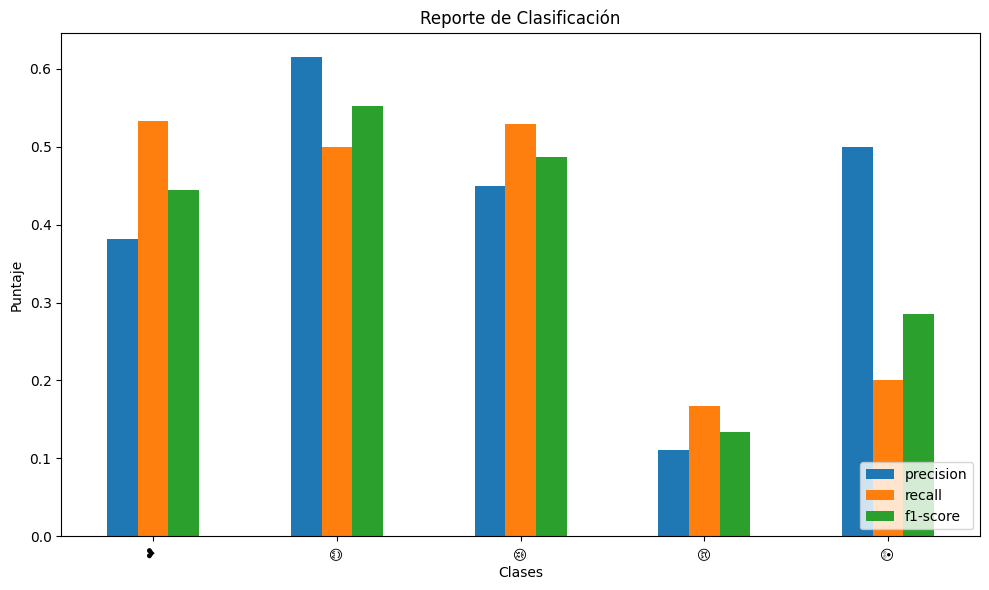

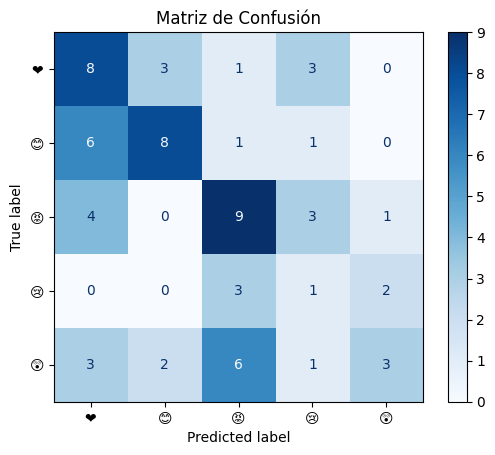

In [12]:
report_df = pd.DataFrame(report).transpose()

# Grafica del reporte
fig, ax = plt.subplots(figsize=(10, 6))
report_df.iloc[:-3, :-1].plot(kind="bar", ax=ax)
plt.title("Reporte de Clasificación")
plt.ylabel("Puntaje")
plt.xlabel("Clases")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Graficar la matriz de confusión
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap="Blues", colorbar=True)
plt.title("Matriz de Confusión")
plt.show()

El modelo presentado tiene la capacidad de identificar emociones(representandolas con emojis), tiene un desempeño intermedio (con un accuracy de 0.42 ) y logra identificar bien algunas emociones como felicidad (😊) y enojo (😡), pero presenta problemas en clases como tristeza (😢) y sorpresa (😲). Posiblemente se deba a la necesidad de ampliar el dataset y támbien sería útil explorar técnicas más avanzadas de procesamiento de lenguaje natural para obtener predicciones más precisas y reducir la confusión entre clases.